### Parker Wind

$$\xi=\frac{r}{a}\\\tau=\frac{T(r)}{T_0}\\\lambda=\frac{GMM_\odot}{2akT_0}\\\psi=\frac{Mv^2}{2kT_0}$$
$$\frac{d\psi}{d\xi}(1-\frac{\tau}{\psi})=-2\xi^2\frac{d}{d\xi}(\frac{\tau}{\xi^2})-\frac{2\lambda}{\xi^2}$$

$$0<r<a:\tau=\xi^{-1/(n+1)}$$
$$a\leq r<b: \tau=1$$
$$r\geq b:\tau=0$$
for ionized hydrogen: $n=\frac{5}{2}$  
$a=10^{11} cm\\M=1.66\times 10^{-24} g\\\lambda=8\times 10^6/T_0\\v^2=1.7\times 10 ^{-2}T_0 \psi$

For $r>b$, $\tau\cong 0$:
$$\psi(\xi)=\psi(\frac{b}{a})-\lambda(\frac{a}{b}-\frac{1}{\xi})$$
For $r<b$, $\tau=1$:
$$\psi-ln\psi=-3-4ln\frac{\lambda}{2}+4ln\xi+\frac{2\lambda}{\xi}$$

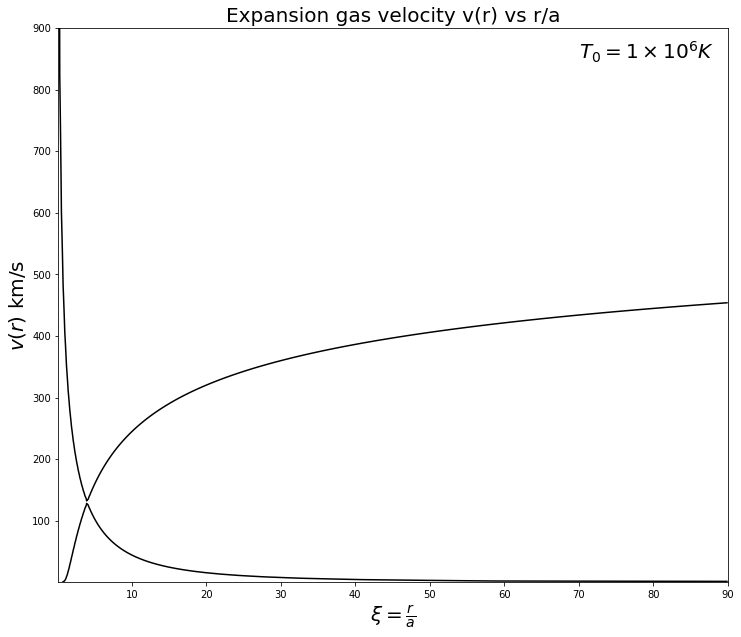

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = 1e11
M = 1.66e-24
T0 = 1e6
lmbda = 8e6 / T0

def eq(x, y):
    f = -3 - 4 * np.log(lmbda / 2) + 4 * np.log(x) + 2 * lmbda / x
    g = ((y**2)/((1.7e-2)*T0)) - np.log((y**2)/((1.7e-2)*T0))
    return g-f

x = np.linspace(0.1, 90, 400)
y = np.linspace(0.1, 900, 400)
X, Y = np.meshgrid(x, y)
Z = eq(X, Y)


plt.subplots(figsize=(12, 10), dpi=72)

contours = plt.contour(X, Y, Z, levels=[0], colors='black')
# plt.clabel(contours_v, inline=True, fontsize=8)

plt.xlabel(r'$\xi=\frac{r}{a}$', fontsize=20)
plt.ylabel(r'$v(r)\ \mathrm{km/s}$', fontsize=20)
plt.text(70,850, r'$T_0=1\times 10^6 K$', fontsize=20)
plt.title('Expansion gas velocity v(r) vs r/a', fontsize = 20)
plt.show()


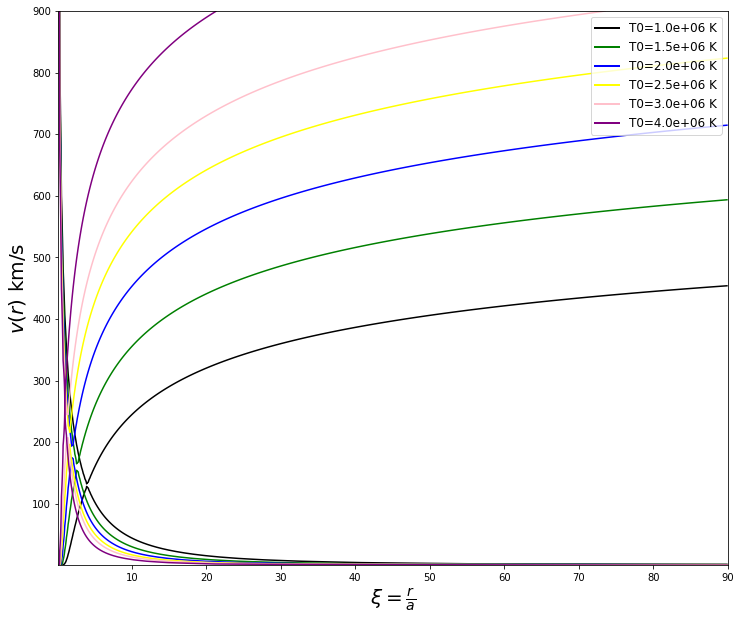

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

a = 1e11
M = 1.66e-24
T0_values = [1e6, 1.5e6, 2e6, 2.5e6, 3e6, 4e6]
lmda_values = [8e6 / T0 for T0 in T0_values]
colors = ['black', 'green', 'blue', 'yellow', 'pink', 'purple']

def eq(x, y, lmda):
    f = -3 - 4 * np.log(lmda / 2) + 4 * np.log(x) + 2 * lmda / x
    g = ((y**2)/((1.7e-2)*T0)) - np.log((y**2)/((1.7e-2)*T0))
    return g - f

x = np.linspace(0.1, 90, 400)
y = np.linspace(0.1, 900, 400)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(12, 10), dpi=72)
legend_lines = []
for T0, lmda, color in zip(T0_values, lmda_values, colors):
    Z = eq(X, Y, lmda)
    contours = plt.contour(X, Y, Z, levels=[0], colors=color)
    label = f'T0={T0:.1e} K'
    legend_lines.append(Line2D([0], [0], color=color, lw=2, label=label))

plt.xlabel(r'$\xi=\frac{r}{a}$', fontsize=20)
plt.ylabel(r'$v(r)\ \mathrm{km/s}$', fontsize=20)

plt.legend(handles=legend_lines, loc='upper right', fontsize=12)

plt.show()